<h1><center><b>Air Pollution prediction</b></center></h1>

### **Why?**

#### *With the advent of industrialization and digitalization comes it's causes and effects.*

![](https://rtmagazine.com/wp-content/uploads/2019/05/air-pollution-smog-1500-1280x640.jpg)


In this 21st century we all are facing one of the biggest problem of rising levels of pollution in our environment in various expressions via Air, Water, Soil, etc.

In all of them, the one with the widest depth and breadth of destruction to humanity is Air pollution. These days we don't even need data to prove our statements, the real conditions out there are self sufficient to hold the weight. With each season comes a new record breaking news favouring the Air pollution. Whether it is SMOG in winters or *hazy* environment conditions during fall in nothern India. Every time we are repeating the same mistake.

Though we are already late, but still this is the time to put some solid focussed awareness towards this global cause, otherwise the day is not far when we will be packing our bags for mars.


### **Why this Prediction?**

Here we have done some analysis of historic data on Air Quality since Air is what keeps us alive and it is our duty to monitor it and understand it's quality.

The data is collected from Kaggle.

We'll start by importing the necessary libraries for out analysis.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next we will load our dataset

In [4]:
# url = "https://www.kaggle.com/rohanrao/air-quality-data-in-india?select=city_day.csv"
data = pd.read_csv('city_day.csv')
df = pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df['AQI_Bucket'].unique

<bound method Series.unique of 0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
29526            Good
29527    Satisfactory
29528    Satisfactory
29529    Satisfactory
29530            Good
Name: AQI_Bucket, Length: 29531, dtype: object>

In [6]:
!pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10667 sha256=111eae8740028fe2f07b0946601f1f30a5642e824831a67637c04adf810d05b4
  Stored in directory: c:\users\abhin\appdata\local\pip\cache\wheels\d9\f2\53\6d8c73011f73fc347598d683ff8b2343605ad43474ae083816
Successfully built rfpimp


Now let's look at some of the basic statistics of our dataset

This can be done easily by using describe() method of pandas module 

It simply shows us various parameters of measure of our dataset.

In [7]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


*describe()* method gives only the statistical acumen.

For more additional information like **datatypes, null values, column names, number of columns** regarding our data, we use *info()* 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


One more conclusions can be made from our ***info()*** that the count of values in each column is not constant i.e. There is a possibility of having some **null values** in out dataset.

Now, let's find them.

In [9]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

Here we can see that there are null values in all the columns except *City* and *Date*

After looking at the info of our dataset, we can see that there are total **16 columns** in our data. 

Let's name them.

In [10]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [11]:
missing_val = pd.DataFrame(df.isna().sum()/len(df))
missing_val.columns = ['Proportion']
missing_val = missing_val.sort_values(by = 'Proportion', ascending=False)
missing_val.style.background_gradient(cmap='Blues')

,Proportion
Xylene,0.613220
PM10,0.377231
NH3,0.349734
Toluene,0.272290
Benzene,0.190410
AQI,0.158511
AQI_Bucket,0.158511
PM2.5,0.155701
NOx,0.141715
O3,0.136196


Here we just calculated the proportion of null values in each of the features using **isna()** method which simply fetches the NULL values.


### Let's do a little bit of data cleaning

We'll start by dealing with the null values

Here instead of eliminating the NULL values, we can fill them with mean values for numerical values

In [12]:
for col in data.columns:
    if data[col].dtype =="O":
        continue
    else:
        data[col] = data[col].fillna(data[col].mean())

data['AQI_Bucket'] = data['AQI_Bucket'].fillna('Not Known')
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,Not Known
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,Not Known
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,Not Known
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,Not Known
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,Not Known


We just filled our Nan and NULL values with their mean and customly defined values.

In [13]:
data.isna().count()

City          29531
Date          29531
PM2.5         29531
PM10          29531
NO            29531
NO2           29531
NOx           29531
NH3           29531
CO            29531
SO2           29531
O3            29531
Benzene       29531
Toluene       29531
Xylene        29531
AQI           29531
AQI_Bucket    29531
dtype: int64

Now, we can see in our dataset that data is distributed on daily basis, it will become a tedious task if we will be going on daily basis data for training our model at firsthand. So to make things simple let's ground data on monthly basis for five years.
It will give us a fair idea about the fairness of data as well about the performance of our model on testing data.

In [14]:
dataf = pd.DataFrame(data)
dataf['Year'] = pd.DatetimeIndex(dataf['Date']).year
dataf['Month'] = pd.DatetimeIndex(dataf['Date']).month
dataf = dataf.groupby(['City', 'Year','Month'])[['PM2.5', 'PM10','NOx','CO','NH3','O3','SO2','Benzene','Toluene','Xylene','AQI']].mean()
dataf.reset_index(['City','Year','Month'])
dataf.head()

PM2.5        PM10        NOx         CO        NH3  \
City      Year Month                                                            
Ahmedabad 2015 1       69.415987  118.127103  39.480968  22.424793  23.483476   
               2      110.888990  118.127103  49.005263  19.723064  23.483476   
               3      109.081632  118.127103  40.930617  13.658019  23.483476   
               4      101.682000  118.127103  26.932333   7.306333  23.483476   
               5       74.919355  118.127103  24.751935   8.529677  23.483476   

                             O3        SO2    Benzene    Toluene    Xylene  \
City      Year Month                                                         
Ahmedabad 2015 1      46.350645  43.602903   1.463871   2.531290  2.976452   
               2      47.133368  57.980212   8.059019  21.669390  7.241442   
               3      45.389401  57.443935  10.720995  27.081322  4.040649   
               4      31.376000  51.233333   2.681333   7.461000  4.354000   
               5      31.624194  35.977419   3.690968  10.779677  5.206774   

                             AQI  
City      Year Month              
Ahmedabad 2015 1      184.257428  
               2      482.692527  
               3      394.173895  
               4      284.943930  
               5      260.337535

NOTE: It's a good practice to version the data ans your work for future references.

In [15]:
dataf.to_csv('data.csv')

Now, as we transformed our data on monthly basis we lost our **AQI_Bucket** column in order to group all the numerical columns(features).

So, now let's include it back in our data.

It has a simple function of classifying the AQI into different buckets like normal, moderate, unhealthy, hazardous, etc...

In [16]:
data2 = dataf.copy(deep=True)

conditions = [
              (data2['AQI'] > 0) & (data2['AQI'] <50),
              (data2['AQI'] > 51) & (data2['AQI'] <100),
              (data2['AQI'] > 101) & (data2['AQI'] <150),
              (data2['AQI'] > 151) & (data2['AQI'] <200),
              (data2['AQI'] > 201) & (data2['AQI'] <300),
              (data2['AQI'] > 300)
]

values = ['Good', 'Moderate', 'Unhealthy for sensitive group',
          'Unhealthy', 'Very Unhealthy', 'Hazardous']

data2['AQI_Bucket'] = np.select(conditions, values)

data2.head()

PM2.5        PM10        NOx         CO        NH3  \
City      Year Month                                                            
Ahmedabad 2015 1       69.415987  118.127103  39.480968  22.424793  23.483476   
               2      110.888990  118.127103  49.005263  19.723064  23.483476   
               3      109.081632  118.127103  40.930617  13.658019  23.483476   
               4      101.682000  118.127103  26.932333   7.306333  23.483476   
               5       74.919355  118.127103  24.751935   8.529677  23.483476   

                             O3        SO2    Benzene    Toluene    Xylene  \
City      Year Month                                                         
Ahmedabad 2015 1      46.350645  43.602903   1.463871   2.531290  2.976452   
               2      47.133368  57.980212   8.059019  21.669390  7.241442   
               3      45.389401  57.443935  10.720995  27.081322  4.040649   
               4      31.376000  51.233333   2.681333   7.461000  4.354000   
               5      31.624194  35.977419   3.690968  10.779677  5.206774   

                             AQI      AQI_Bucket  
City      Year Month                              
Ahmedabad 2015 1      184.257428       Unhealthy  
               2      482.692527       Hazardous  
               3      394.173895       Hazardous  
               4      284.943930  Very Unhealthy  
               5      260.337535  Very Unhealthy

Now let's see correlation between various features using seaborn method **pairplot()**

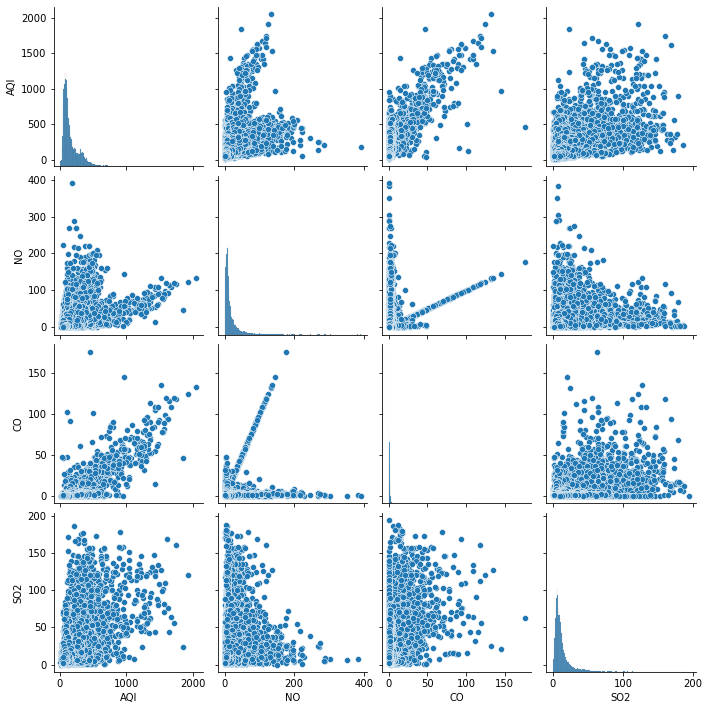

In [17]:
df2 = df[['AQI', 'NO', 'CO', 'SO2']]
sns.pairplot(df2)

#### From the above plot we can infer the following points:

*  AQI is for sure positively correlated with all the features in the plot i.e. SO2, NO and CO

*  In these three features under observation, SO2 is strongly correlated with AQI, as when SO2 content increases in the atmosphere AQI also increases 

*  Most of the AQI values lies between **0-1000 for NO**, **0-100 for CO** and **0-1200 for SO2** 

*  Here also we can see the AQI ranges in 1000s for SO2 

Text(0.5, 1.0, 'Correlation Analysis')

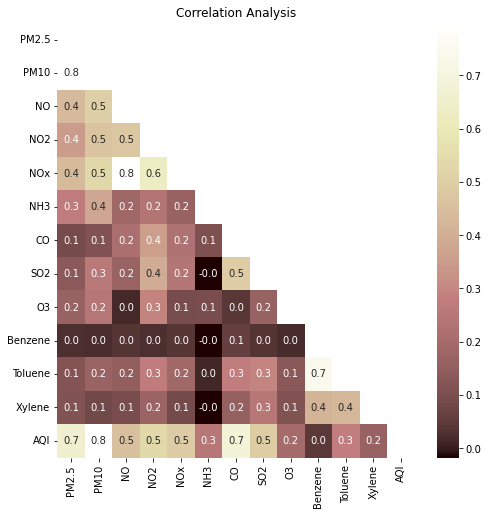

In [18]:

# FOr more details we can see for correlation heatmap of features 

plt.figure(figsize=(8,8))
mask=np.triu(df.corr(method='pearson'))
sns.heatmap(df.corr(method='pearson'),
            annot=True,fmt='0.1f',
            mask=mask,
            robust=True,
            cmap='pink')
plt.title('Correlation Analysis')

Here we can note down certain points from out correlation heatmap:
* The darker the block is, **weaker**(or negative) the correlation is.
* **CO, PM10, PM2.5** have the highest correlation with AQI. 
* Looking at the correlation of different features we can consider Benzene, Xylene and O3 as weakest features having no major contributon towards the defination of AQI.

### Top 10 cities with highest Average AQI

In [19]:
x = pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI', ascending=False).head(10))
x = x.reset_index('City')
x

,City,AQI
0,Ahmedabad,452.122939
1,Delhi,259.487744
2,Patna,240.782042
3,Gurugram,225.123882
4,Lucknow,217.973059
5,Talcher,172.886819
6,Jorapokhar,159.251621
7,Brajrajnagar,150.280505
8,Kolkata,140.566313
9,Guwahati,140.111111


<AxesSubplot:xlabel='AQI', ylabel='City'>

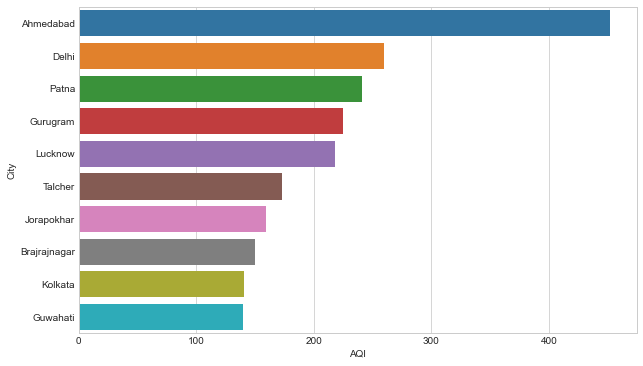

In [20]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(data=x, x='AQI', y='City', orient='h')

Here, we can mention few outcomes from this plot:
* Top 10 cities have average AQI above than 140
* Ahemdabad has the highest level of AQI with an average score of 452.122
* The remaining 9 cities have their AQI values concentrated to a value in range of 150-250
* Top Three cities are also capital regions which shows the level of air pollutants in those flagship areas.
 

In [21]:
x2 = pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI', ascending=False))
x2.count()

AQI    26
dtype: int64

In [22]:
# xx = df[['City', 'Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'AQI']]
x3 = df[['City', 'Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2']]
x4 = df[['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2']]
y3 = df[['AQI']]
print(x3.count())
print(y3.count())

City     29531
Date     29531
PM2.5    24933
NO       25949
NO2      25946
NOx      25346
CO       27472
SO2      25677
dtype: int64
AQI    24850
dtype: int64


In [23]:
y3.isna().sum()

AQI    4681
dtype: int64

In [24]:
x5 = x4.dropna()
x5.count()

PM2.5    22610
NO       22610
NO2      22610
NOx      22610
CO       22610
SO2      22610
dtype: int64

In [25]:
y5 = y3.dropna()
y5.count()

AQI    24850
dtype: int64

In [26]:
y5 = y5.head(22610)
y5.count()

AQI    22610
dtype: int64

In [27]:
# importing ML libraries
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [28]:
features = ['PM2.5','PM10','NOx','CO','NH3','O3','SO2','Benzene','Toluene','Xylene','AQI']

Let's slice the dataset for training and testing 

In [29]:
data_train, data_test = train_test_split(dataf, test_size=0.20)
data_train = data_train[features]
data_test = data_test[features]

dxtrain, dytrain = data_train.drop('AQI', axis=1), data_train['AQI']
dxtest, dytest = data_test.drop('AQI', axis=1), data_test['AQI']

In [30]:
dxtrain.head()

,,,PM2.5,PM10,NOx,CO,NH3,O3,SO2,Benzene,Toluene,Xylene
City,Year,Month,,,,,,,,,,
Hyderabad,2015,11,60.782333,103.045667,15.896000,0.973667,9.450667,34.778333,10.021000,1.304000,7.023000,1.131000
Ahmedabad,2015,3,109.081632,118.127103,40.930617,13.658019,23.483476,45.389401,57.443935,10.720995,27.081322,4.040649
Chennai,2016,11,70.294000,118.127103,14.673667,0.067000,23.483476,39.235667,4.635667,0.367667,0.526333,3.070128
Amaravati,2019,7,12.890645,29.360000,11.861290,0.449355,3.131935,27.794516,16.267097,0.137742,1.581613,0.194516
Patna,2016,5,88.726129,118.127103,32.215484,1.470323,23.483476,25.850645,6.728387,0.194839,0.797419,0.511290


In [31]:
dytrain.head()

City       Year  Month
Hyderabad  2015  11       139.166667
Ahmedabad  2015  3        394.173895
Chennai    2016  11       140.933333
Amaravati  2019  7         57.191199
Patna      2016  5        189.677419
Name: AQI, dtype: float64

In [32]:
# x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.33)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x4, y3, test_size=0.33)
x_train3, x_test3, ytrain3, y_test3 = train_test_split(x5, y5, test_size=0.33)

In [33]:
# model instance definitions for linear regression

l4 = linear_model.LinearRegression()

modelall = l4.fit(dxtrain, dytrain)
modelall

LinearRegression()

In [34]:
y_hat = l4.predict(dxtest)

print('Mean_Squared_Error : ', mean_squared_error(dytest, y_hat))

Mean_Squared_Error :  728.5083502496302


In [35]:
y_hat

array([149.51813399, 158.38135301, 163.08363613,  96.07174531,
       187.0536692 , 134.90397872, 107.5265887 , 262.18036586,
       460.59018726, 124.15402166,  85.53568048,  88.12104807,
       248.22370162, 171.57968322,  91.28542812,  93.65679423,
        89.31669369, 178.83004059, 144.4627625 , 144.81490523,
       140.40726123, 459.16342415, 118.75680929,  61.5804651 ,
       129.69057685, 179.49151838, 166.14501769, 365.62968198,
       134.61047936,  85.30791223, 196.45607693, 152.37474979,
       106.82540727, 161.52004027, 152.31684406, 142.63600629,
        92.92332337, 201.75709259, 201.66946589,   8.54615744,
       151.69269503, 205.13522317,  57.09240715, 136.73281769,
       151.70526493,  98.62069777,  79.01537004, 106.91167825,
       124.40349678,  18.84867846, 494.52405155,  75.11972558,
       100.99532523, 203.3011505 ,  79.6163228 , 666.22976603,
        89.35539101, 145.93056565,  92.30136571,  48.44971378,
        93.11431568,  64.1445657 ,  98.01997541, 154.84

In [36]:
p = l4.predict([[25, 35, 95, 100, 50, 78, 55, 15, 10, 5]])
print(p)

[1312.15880777]


In [37]:
import pickle

fea = data_train['PM2.5'].values.reshape(-1, 1)
tar = data_train['AQI'].values

# defining model instance for linear regression
ol = linear_model.LinearRegression()

# model training
model1 = ol.fit(fea, tar)

print("Model Trained with parameters:/n Model Coefficient : ",model1.coef_,"/n Model Intercept : ",model1.intercept_)

# prediction
pp = ol.predict(fea)

# r2 score
r2 = r2_score(tar, pp)
print("r2 score for trained Model : ",r2)

Model Trained with parameters:/n Model Coefficient :  [1.61405539] /n Model Intercept :  53.71629010577905
r2 score for trained Model :  0.5523507998483872


So here using only one parameter i.e. **PM2.5** we got a r2 score of 0.489 which is not a good one to have but a better one to start with.

We need to look to oiur datapoints as it simply shows that our data might be scattered due to which it has a low r2 score.

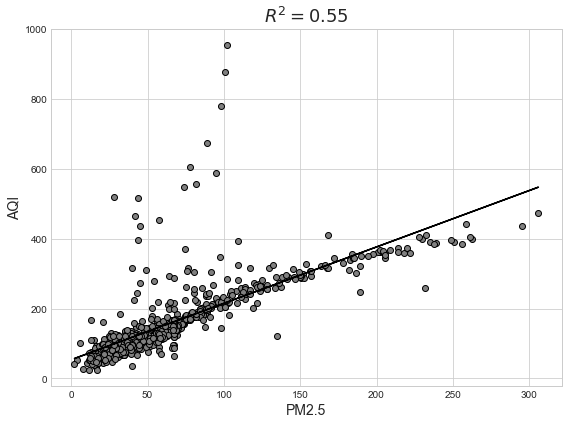

In [38]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(fea, pp, color='k', label='Regression model')
ax.scatter(fea, tar, edgecolor = 'k', facecolor = 'grey', label='Data')
ax.set_xlabel('PM2.5', fontsize=14)
ax.set_ylabel('AQI', fontsize=14)

ax.set_title('$R^2 = %.2f$'%r2, fontsize=18)
fig.tight_layout()

In [39]:
# pickle the models for external or future use
filename1 = 'modelall.sav'
filename2 = 'model1.sav'
pickle.dump(modelall, open(filename1, 'wb'))
pickle.dump(model1, open(filename2, 'wb'))
print("Pickled the models")

Pickled the models
